In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib  import * 
from scipy import stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train = pd.read_csv("DataTrained/titanic_train.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

### checking for duplicates

In [5]:
df_train.duplicated().any()

False

We see there are no duplicate values

### checking for null values

In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

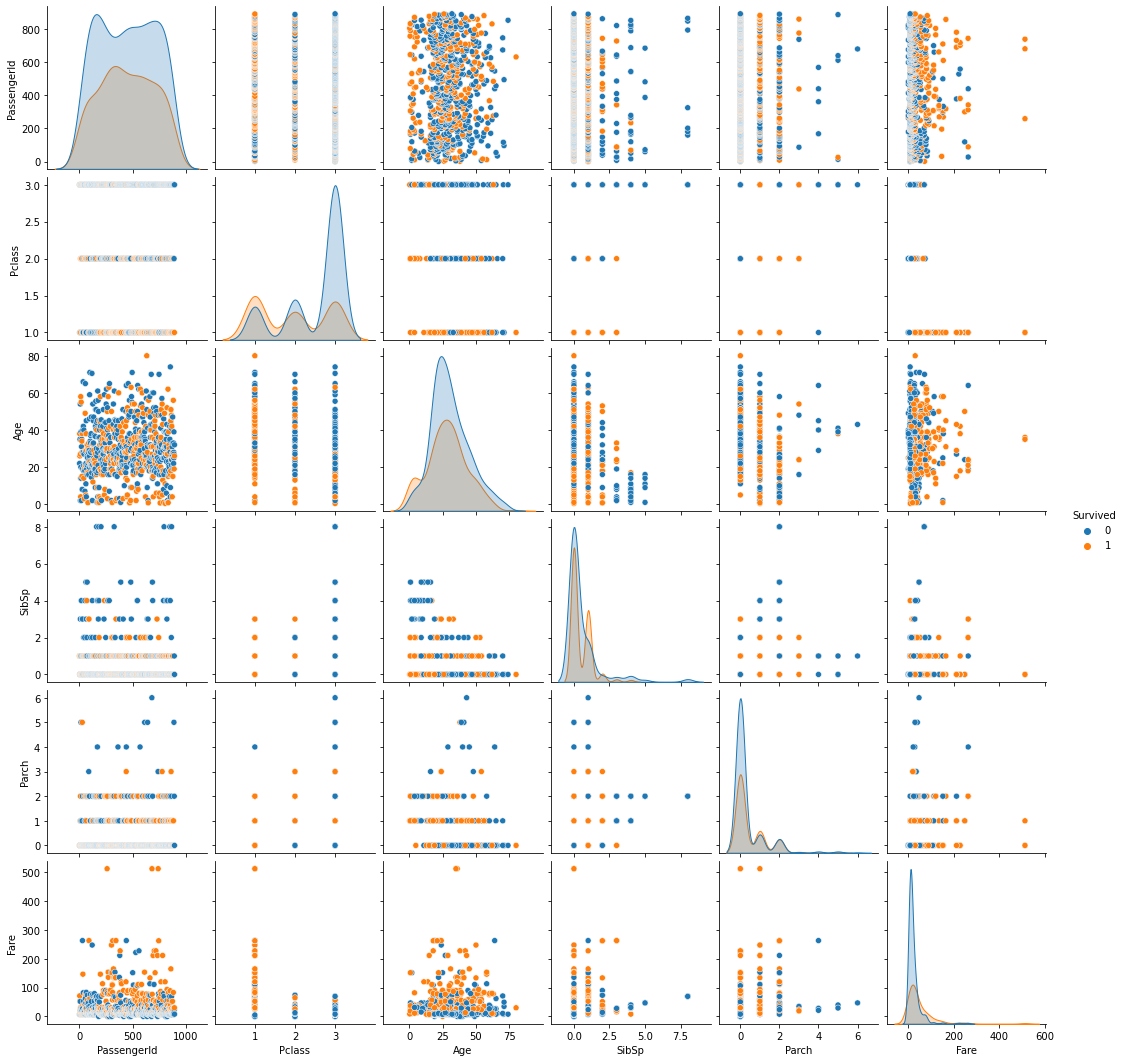

In [9]:
sns.pairplot(df_train, hue="Survived")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

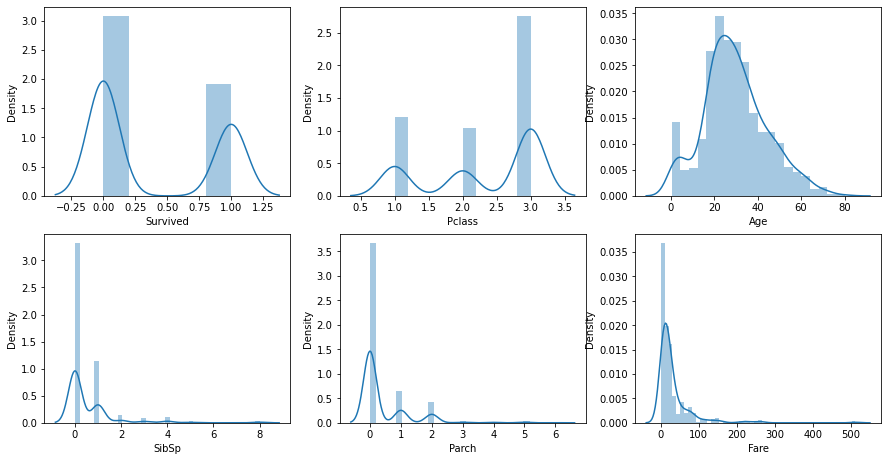

In [10]:
plt.figure(figsize=(15,16))

plt.subplot(4, 3, 1)
sns.distplot(df_train['Survived'])

plt.subplot(4, 3, 2)
sns.distplot(df_train['Pclass'])

plt.subplot(4, 3, 3)
sns.distplot(df_train['Age'])

plt.subplot(4, 3, 4)
sns.distplot(df_train['SibSp'])

plt.subplot(4, 3, 5)
sns.distplot(df_train['Parch'])

plt.subplot(4, 3, 6)
sns.distplot(df_train['Fare'])

# Handling missing values

### There are only 2 null values in Embarked. So I'll fill it with the most frequently occurring value.


In [11]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [12]:
df_train['Embarked']=df_train['Embarked'].fillna('S')
df_train['Embarked'].isnull().any()

False

### Filling missing values of age with mean values.

In [13]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())

In [14]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


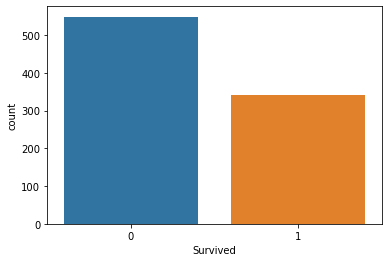

In [15]:
sns.countplot(x='Survived', data=df_train);

In [16]:
print((df_train.Survived.sum()/df_train.Survived.count())*100)

38.38383838383838


### Only 38% people survived

### Checking count of how many female and male passengers survived

In [17]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

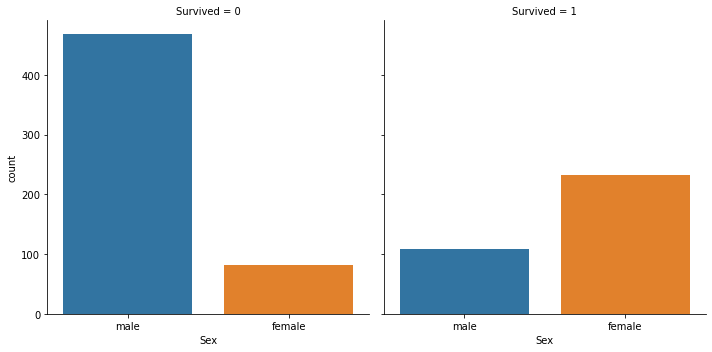

In [18]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train);

#### Checking percentage of womens and mens survived

In [19]:
print("Percentage of women survived: " , (df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())*100)
print("Percentage of men survived:   " , (df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())*100)

Percentage of women survived:  74.20382165605095
Percentage of men survived:    18.890814558058924


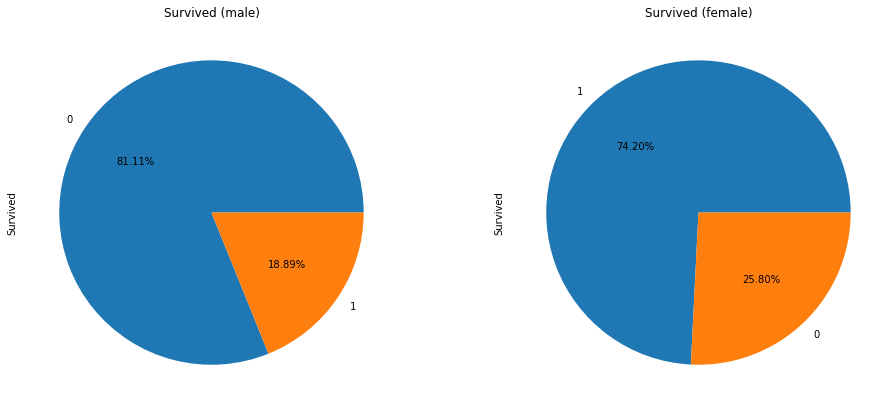

In [20]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(autopct='%1.2f%%')
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

##### Women were more likely to survive than men.

##### 74% of women survived but only about 19% of men survived

## Survival Rate per Fare

max fare: $512.33.


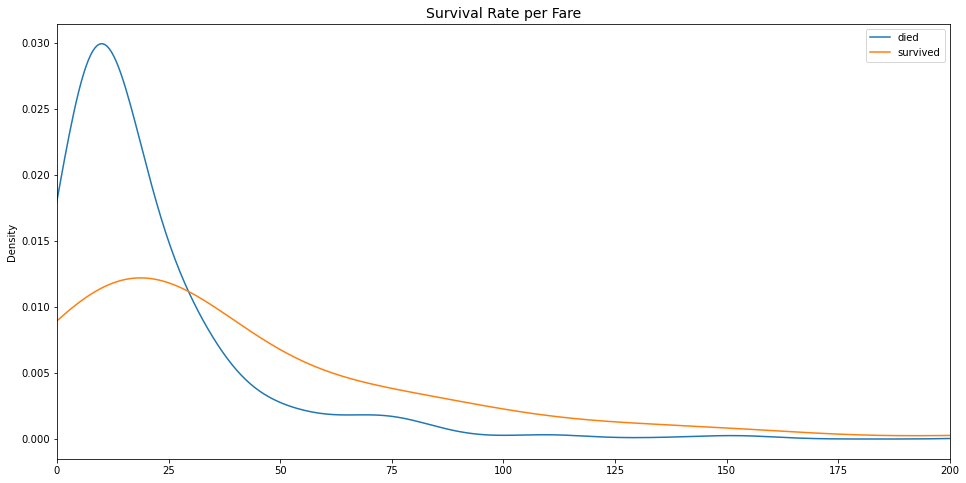

In [21]:
plt.figure(figsize=(16,8))
df_train.Fare[df_train.Survived == 0].plot(kind='kde')
df_train.Fare[df_train.Survived == 1].plot(kind='kde')
plt.title('Survival Rate per Fare', fontsize=14)
plt.legend(('died', 'survived'), loc='best')
plt.xlim(0,200)

print('max fare: ${:.2f}.'.format(df_train.Fare.max()))

##### Passengers paying the lower fares were most likely to die.

# Pclass

In [22]:
df_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

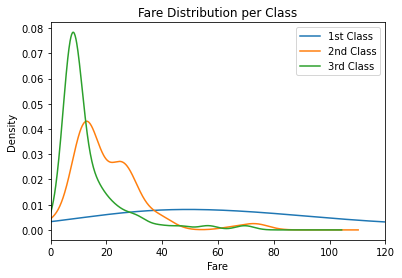

In [23]:

df_train.Fare[df_train.Pclass == 1].plot(kind='kde')
df_train.Fare[df_train.Pclass == 2].plot(kind='kde')
df_train.Fare[df_train.Pclass == 3].plot(kind='kde')
plt.title('Fare Distribution per Class')
plt.xlabel('Fare')
plt.legend(('1st Class','2nd Class','3rd Class'), loc='best')
plt.xlim(0,120)
plt.show()

(0.0, 100.0)

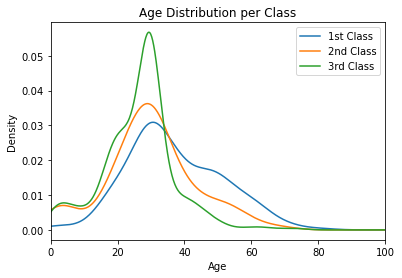

In [24]:

df_train.Age[df_train.Pclass == 1].plot(kind='kde')
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')
plt.title('Age Distribution per Class')
plt.xlabel('Age')
plt.legend(('1st Class','2nd Class','3rd Class'), loc='best')
plt.xlim(0,100)

##### Average age of 1st class passengers is close to 40, with the fare being almost 4 times more than the other two classes

##### Average age of 2nd class passengers is close to 30, which implies that most of the young adults were 2nd class passengers

##### Average age of 3rd class passengers is around 25, with the fares being almost half of 2nd class

In [25]:
print("Percentage of survivals in") 
print("Pclass=1 : ", (df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())*100)
print("Pclass=2 : ", (df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())*100)
print("Pclass=3 : ", (df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())*100)

Percentage of survivals in
Pclass=1 :  62.96296296296296
Pclass=2 :  47.28260869565217
Pclass=3 :  24.236252545824847


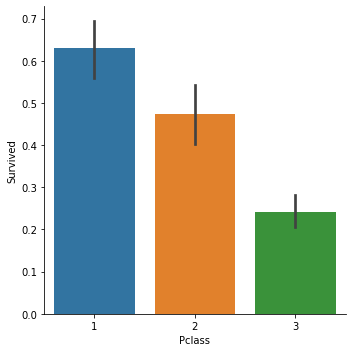

In [26]:
sns.catplot('Pclass','Survived', kind='bar', data=df_train);

In [27]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### Survival rate decreases with Pclass

In [28]:
pd.crosstab(df_train.Pclass,[df_train.Sex, df_train.Survived], margins=True)

Sex      female      male       All
Survived      0    1    0    1     
Pclass                             
1             3   91   77   45  216
2             6   70   91   17  184
3            72   72  300   47  491
All          81  233  468  109  891

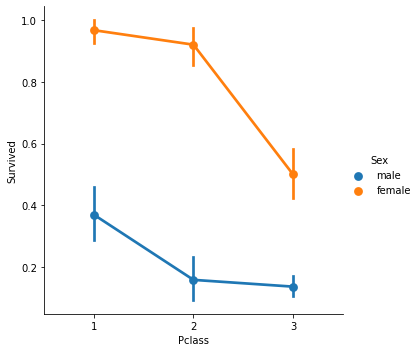

In [29]:
sns.catplot('Pclass','Survived',hue='Sex',kind='point', data=df_train);

##### Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died

# Embarked

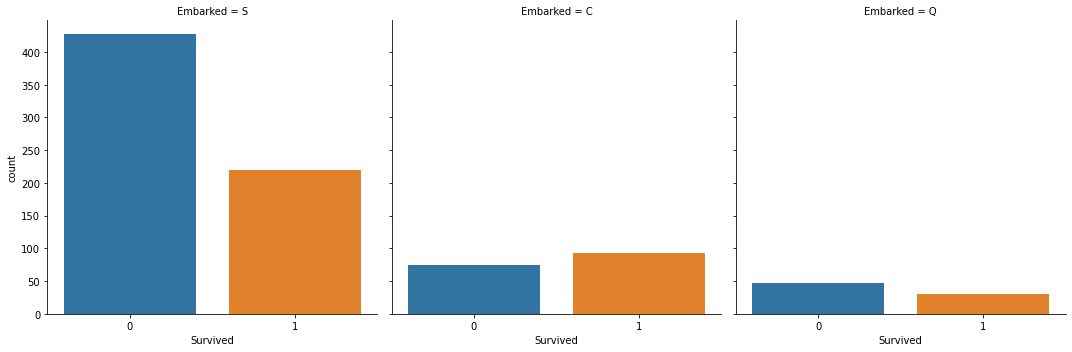

In [30]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train);

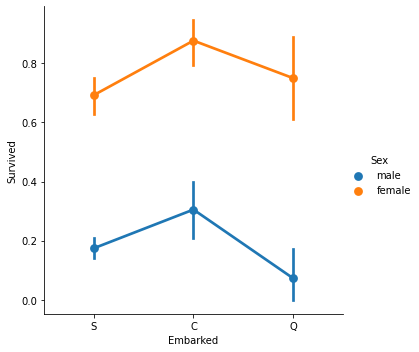

In [31]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df_train);

In [32]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  48  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  50  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  342  
All       265  891

##### Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived.

##### All men of Pclass 1 and 2 embarked in Q died.


# SibSp and Parch

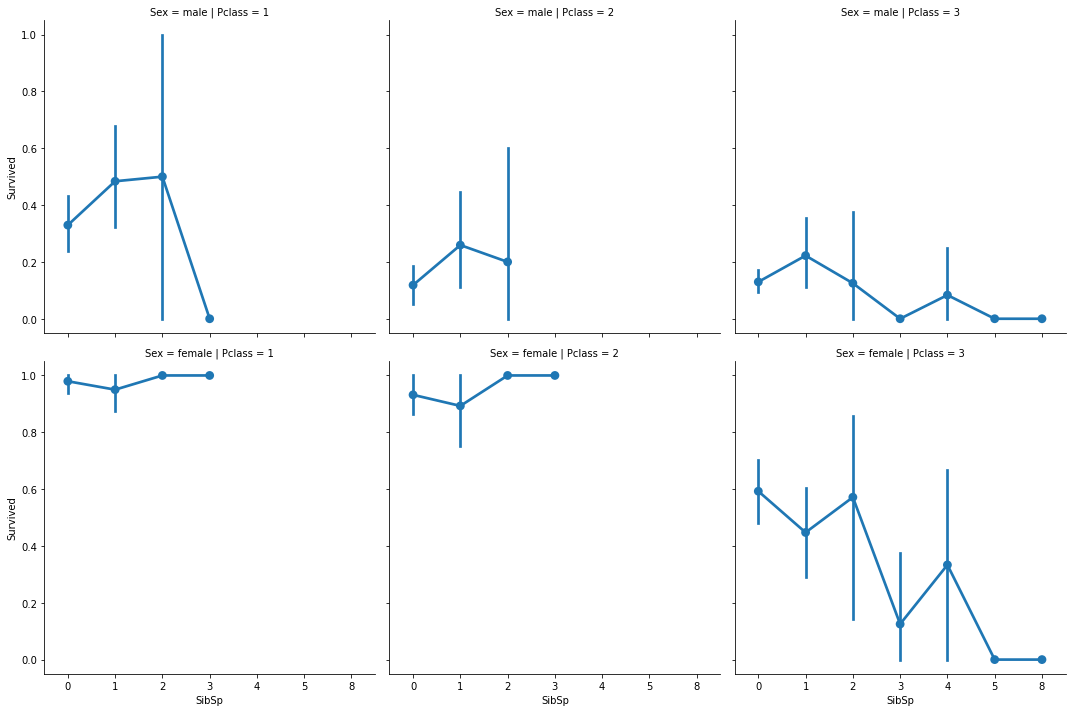

In [33]:
sns.catplot('SibSp','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

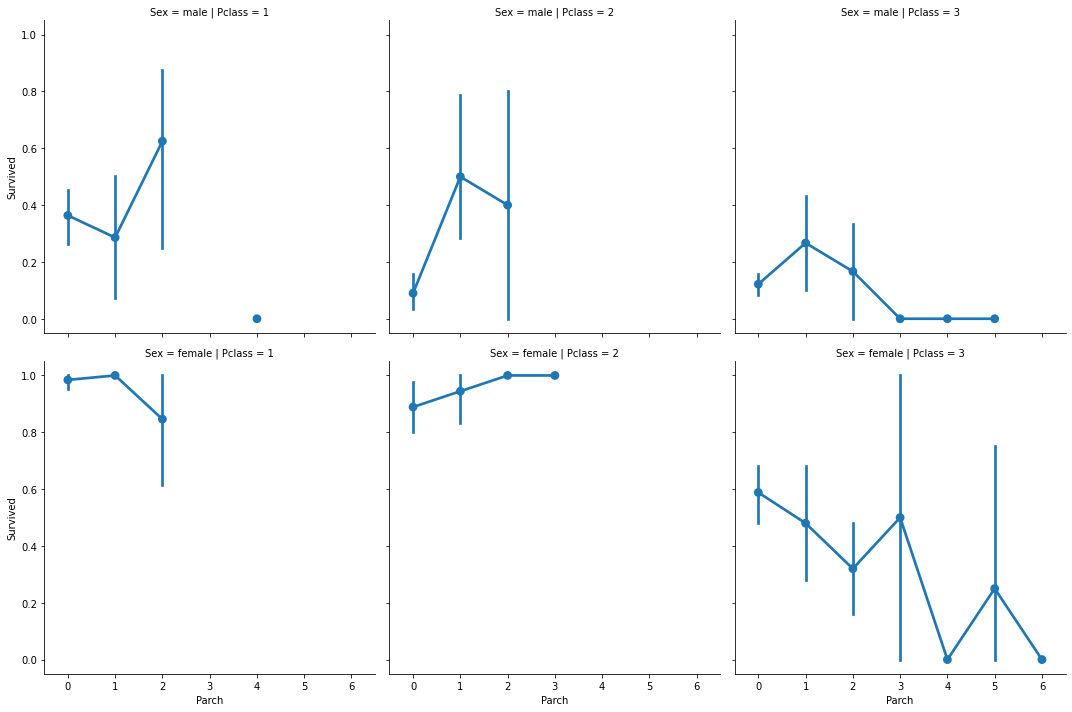

In [34]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [35]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True)

SibSp              0             1          2         3          4  5  8  All
Pclass             1    2    3   1   2   3  1  2   3  1  2   3   3  3  3     
Sex    Survived                                                              
female 0           1    3   33   2   3  21  0  0   3  0  0   7   4  1  3   81
       1          48   41   48  38  25  17  3  3   4  2  1   1   2  0  0  233
male   0          59   67  235  16  20  35  1  4   7  1  0   4  11  4  4  468
       1          29    9   35  15   7  10  1  1   1  0  0   0   1  0  0  109
All              137  120  351  71  55  83  5  8  15  3  1  12  18  5  7  891

In [36]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True)

Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Sex    Survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  260  10   7  22   3   3  15  0  1  1  1  1  0  468
       1          36    8   36   4   7   8   5   2   3  0  0  0  0  0  0  109
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891

##### For males, no survival rate above 0.5 for any values of SibSp. For females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died. For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5

##### For females with Parch = 2 and Pclass = 3 survival rate is below 0.5.All females with Parch = 4 and Pclass = 3 died. All females with Parch > 4 died. (For females with Parch = 1 and Pclass = 3 survival rate is below 0.5) For males,all survival rates below 0.5 for any values of Parch, except for Parch = 2 and Pclass = 1.

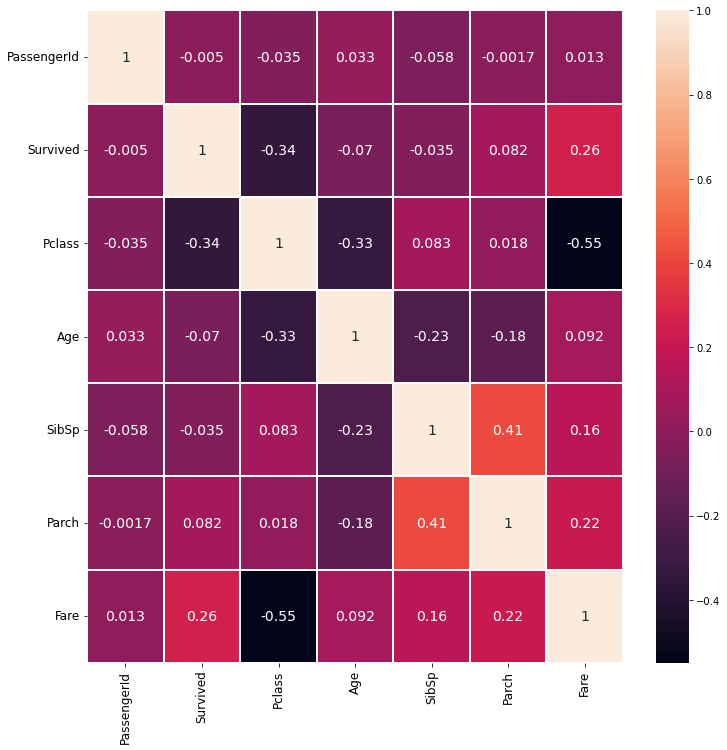

In [37]:
sns.heatmap(df_train.corr(),annot=True,linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Dropping the Name, PassengerId, Cabin and Ticket features.

In [38]:
df_train = df_train.drop(['Name', 'PassengerId', 'Cabin','Ticket'], axis=1)

# Encoding the categorical variables



In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Sex'].unique()

array([1, 0])

In [40]:
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])
df_train['Embarked'].unique()

array([2, 0, 1])

In [41]:
df_train.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

##### We can observe that almost all the features are lightly correlated with target variable.

# Removing target feature

In [42]:
target = df_train['Survived'].to_numpy()

In [43]:
df_train=df_train.drop('Survived', axis=1)

#  Train and Spliting the data 

In [44]:
X = df_train
y = target 

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_pred, y_train, y_pred = train_test_split(X,y, test_size=0.2)

In [46]:
print('X_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('X_pred shape', x_pred.shape)
print('y_pred shape', y_pred.shape)

X_train shape (712, 7)
y_train shape (712,)
X_pred shape (179, 7)
y_pred shape (179,)


In [47]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

# LogisticRegression

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       112
           1       0.70      0.63      0.66        67

    accuracy                           0.76       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.76      0.76      0.76       179



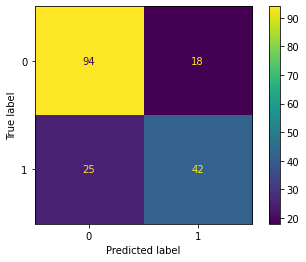

75.97765363128491

In [48]:
import itertools
log = LogisticRegression()
log.fit(x_train,y_train)
pred_log = log.predict(x_pred)
print(classification_report(y_pred, pred_log))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_pred, pred_log, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log.classes_)
disp.plot()
plt.show()




accuracy_score(y_pred, pred_log)*100

## The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications.

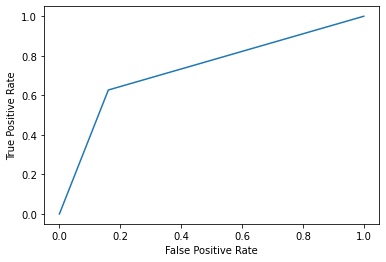

In [49]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_pred, pred_log)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

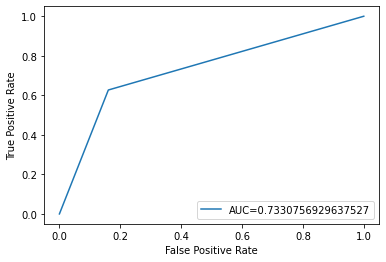

In [50]:
fpr, tpr, _ = metrics.roc_curve(y_pred, pred_log)
auc = metrics.roc_auc_score(y_pred, pred_log)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#  Naive Bayes

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       112
           1       0.69      0.64      0.67        67

    accuracy                           0.76       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



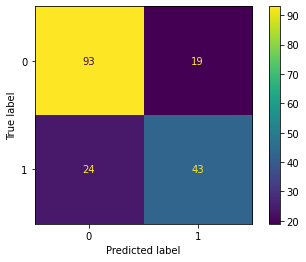

75.97765363128491

In [51]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb = gnb.predict(x_pred)
print(classification_report(y_pred, pred_gnb))

cm = confusion_matrix(y_pred, pred_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=gnb.classes_)
disp.plot()
plt.show()




accuracy_score(y_pred, pred_gnb)*100

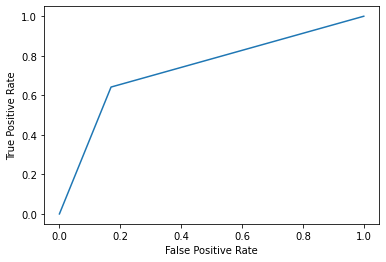

In [52]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_pred, pred_gnb)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

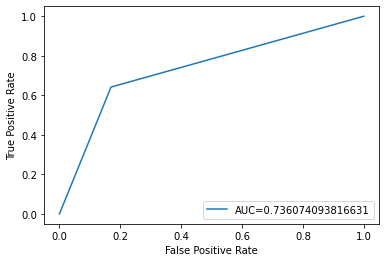

In [53]:
fpr, tpr, _ = metrics.roc_curve(y_pred, pred_gnb)
auc = metrics.roc_auc_score(y_pred, pred_gnb)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

 # KNN - KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       112
           1       0.60      0.46      0.52        67

    accuracy                           0.68       179
   macro avg       0.66      0.64      0.64       179
weighted avg       0.67      0.68      0.67       179



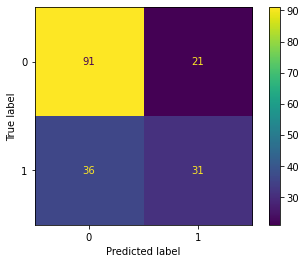

68.15642458100558

In [54]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_pred)
print(classification_report(y_pred, pred_knn))

cm = confusion_matrix(y_pred, pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
disp.plot()
plt.show()




accuracy_score(y_pred, pred_knn)*100

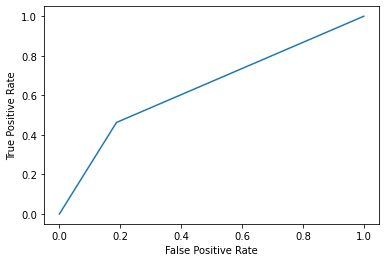

In [55]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_pred, pred_knn)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

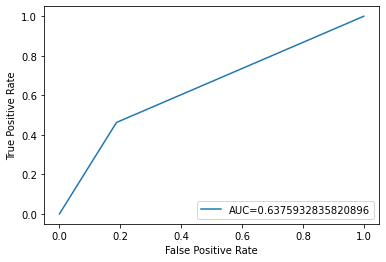

In [56]:
fpr, tpr, _ = metrics.roc_curve(y_pred, pred_knn)
auc = metrics.roc_auc_score(y_pred, pred_knn)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       112
           1       0.70      0.66      0.68        67

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.77      0.76       179



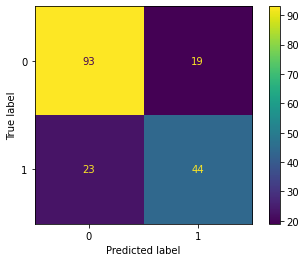

76.53631284916202

In [57]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
pred_dtree = dtree.predict(x_pred)
print(classification_report(y_pred, pred_dtree))

cm = confusion_matrix(y_pred, pred_dtree, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dtree.classes_)
disp.plot()
plt.show()




accuracy_score(y_pred, pred_dtree)*100

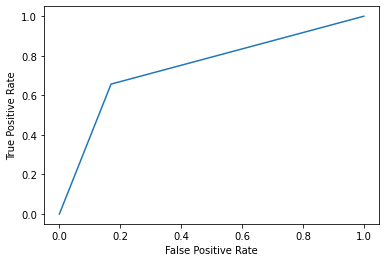

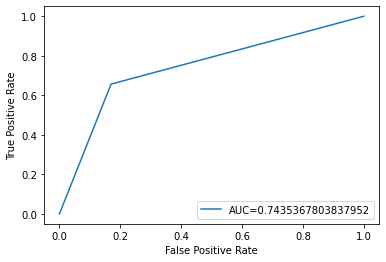

In [58]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_pred, pred_dtree)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_pred, pred_dtree)
auc = metrics.roc_auc_score(y_pred, pred_dtree)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Decision tree with different parameters for max_features, max_depth and min_sample_split

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       112
           1       0.83      0.66      0.73        67

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



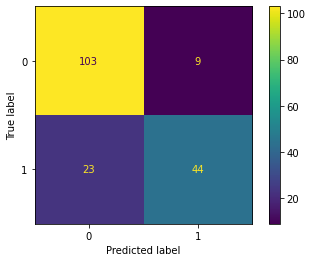

82.12290502793296

In [59]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(x_train,y_train)
pred_dtree_2 = dtree_2.predict(x_pred)
print(classification_report(y_pred, pred_dtree_2))

cm = confusion_matrix(y_pred, pred_dtree_2, labels=dtree_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dtree_2.classes_)
disp.plot()
plt.show()




accuracy_score(y_pred, pred_dtree_2)*100

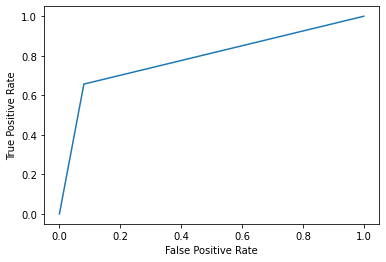

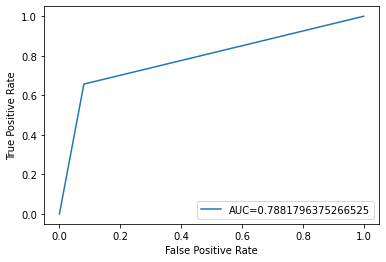

In [60]:
fpr, tpr, _ = metrics.roc_curve(y_pred, pred_dtree_2)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_pred, pred_dtree_2)
auc = metrics.roc_auc_score(y_pred, pred_dtree_2)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       112
           1       0.80      0.66      0.72        67

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



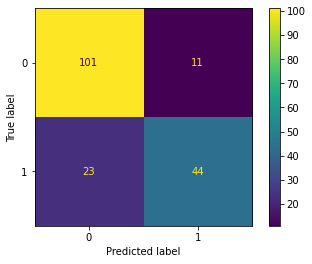

81.00558659217877

In [61]:
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_pred)
print(classification_report(y_pred, pred_rfc))

cm = confusion_matrix(y_pred, pred_rfc, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rfc.classes_)
disp.plot()
plt.show()




accuracy_score(y_pred, pred_rfc)*100

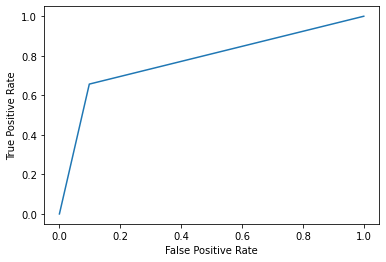

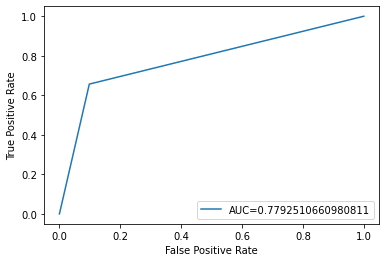

In [62]:
fpr, tpr, _ = metrics.roc_curve(y_pred, pred_rfc)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_pred, pred_rfc)
auc = metrics.roc_auc_score(y_pred, pred_rfc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# SVM Classifier

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       112
           1       0.65      0.67      0.66        67

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



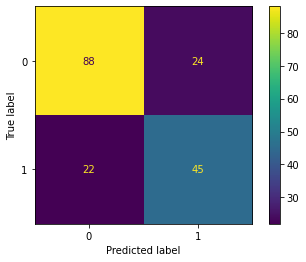

74.30167597765363

In [63]:
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_pred)
print(classification_report(y_pred, pred_svc))

cm = confusion_matrix(y_pred, pred_svc, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svc.classes_)
disp.plot()
plt.show()




accuracy_score(y_pred, pred_svc)*100

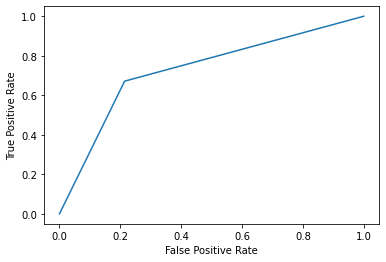

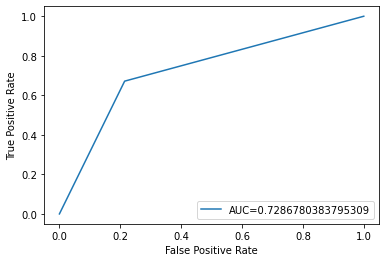

In [64]:
fpr, tpr, _ = metrics.roc_curve(y_pred, pred_svc)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_pred, pred_svc)
auc = metrics.roc_auc_score(y_pred, pred_svc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# k fold cross_validation

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
scores_svc = cross_val_score(svc, x_train,y_train, cv=8, scoring='accuracy')
scores_rfc = cross_val_score(rfc, x_train,y_train, cv=8, scoring='accuracy')
scores_dtree_2 = cross_val_score(dtree_2, x_train,y_train, cv=8, scoring='accuracy')


In [67]:
print("decisiontree CV    : " , scores_dtree_2.mean()*100)
print("randomforest CV    : " , scores_rfc.mean()*100)
print("svc          CV    : " , scores_svc.mean()*100)

decisiontree CV    :  82.30337078651687
randomforest CV    :  82.4438202247191
svc          CV    :  76.26404494382022


In [68]:
print("decisiontree     : " , accuracy_score(y_pred, pred_dtree_2)*100)
print("randomforest     : " , accuracy_score(y_pred, pred_rfc)*100)
print("svc              : " , accuracy_score(y_pred, pred_svc)*100)

decisiontree     :  82.12290502793296
randomforest     :  81.00558659217877
svc              :  74.30167597765363


In [69]:
# import module
from tabulate import tabulate
 
# assign data
mydata = [
    ["DecisionTree",accuracy_score(y_pred, pred_dtree_2)*100,scores_dtree_2.mean()*100 ],
    ["RandomForest", accuracy_score(y_pred, pred_rfc)*100,scores_rfc.mean()*100],
    ["SVC",accuracy_score(y_pred, pred_svc)*100, scores_svc.mean()*100]
     
]
 
# create header
head = ["Model", "Accuracy","Accuracy_CV"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))
table = pd.DataFrame(mydata)

+--------------+------------+---------------+
| Model        |   Accuracy |   Accuracy_CV |
+==============+============+===============+
| DecisionTree |    82.1229 |       82.3034 |
+--------------+------------+---------------+
| RandomForest |    81.0056 |       82.4438 |
+--------------+------------+---------------+
| SVC          |    74.3017 |       76.264  |
+--------------+------------+---------------+


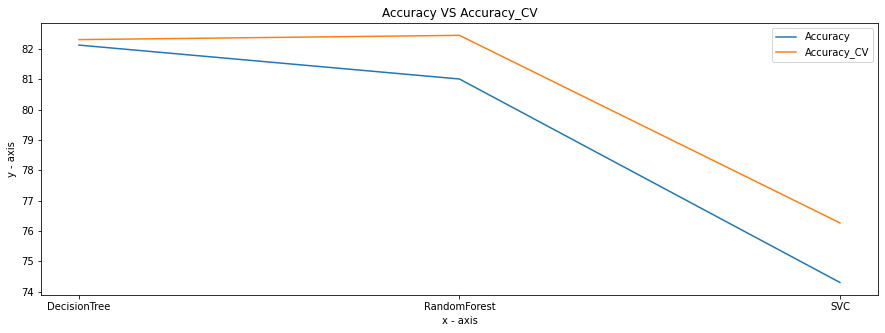

In [70]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(table[0],table[1], label = "Accuracy")
plt.plot(table[0],table[2], label = "Accuracy_CV")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Accuracy VS Accuracy_CV')
plt.legend()
plt.show()

## finding the best hyperparameter using GRID Search CV For Decision Tree


In [101]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
dt_clf = DecisionTreeClassifier()

In [102]:
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100],
           'max_features': ['auto', 'sqrt', 'log2'],'ccp_alpha': [0.1, .01, .001]}
grid_dt = GridSearchCV(dt_clf, param_grid=para_dt, cv=5)

In [103]:
grid_dt.fit(x_train, y_train)

print("parameters for Decision Tree:", grid_dt.best_params_)

parameters for Decision Tree: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 31, 'max_features': 'sqrt', 'min_samples_leaf': 2}


In [104]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 31, min_samples_leaf=2, ccp_alpha= 0.001, max_features ='sqrt')

In [105]:
dt.fit(x_train, y_train)
pred_clf = dt.predict(x_pred)
accuracy_score(y_pred, pred_clf)*100

82.68156424581005

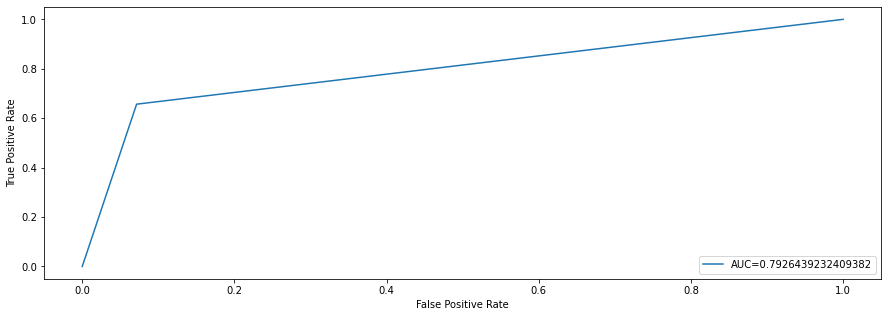

In [108]:
fpr, tpr, _ = metrics.roc_curve(y_pred, pred_clf)
auc = metrics.roc_auc_score(y_pred, pred_clf)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [106]:
# Visualising the graph without the use of graphviz

n_nodes = dt.tree_.node_count
children_left = dt.tree_.children_left
children_right = dt.tree_.children_right
feature = dt.tree_.feature
threshold = dt.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 91 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 5] <= 10.824999809265137 else to node 20.
	node=1 is a split node: go to node 2 if X[:, 1] <= 0.5 else to node 19.
		node=2 is a split node: go to node 3 if X[:, 6] <= 1.5 else to node 4.
			node=3 is a leaf node.
			node=4 is a split node: go to node 5 if X[:, 3] <= 0.5 else to node 18.
				node=5 is a split node: go to node 6 if X[:, 5] <= 10.481249809265137 else to node 17.
					node=6 is a split node: go to node 7 if X[:, 2] <= 27.84955883026123 else to node 16.
						node=7 is a split node: go to node 8 if X[:, 5] <= 7.762500047683716 else to node 9.
							node=8 is a leaf node.
							node=9 is a split node: go to node 10 if X[:, 4] <= 0.5 else to node 15.
								node=10 is a split node: go to node 11 if X[:, 5] <= 9.25 else to node 14.
									node=11 is a split node: go to node 12 if X[:, 2] <= 25.5 else to node 13.
										node=12 is a leaf node.
				

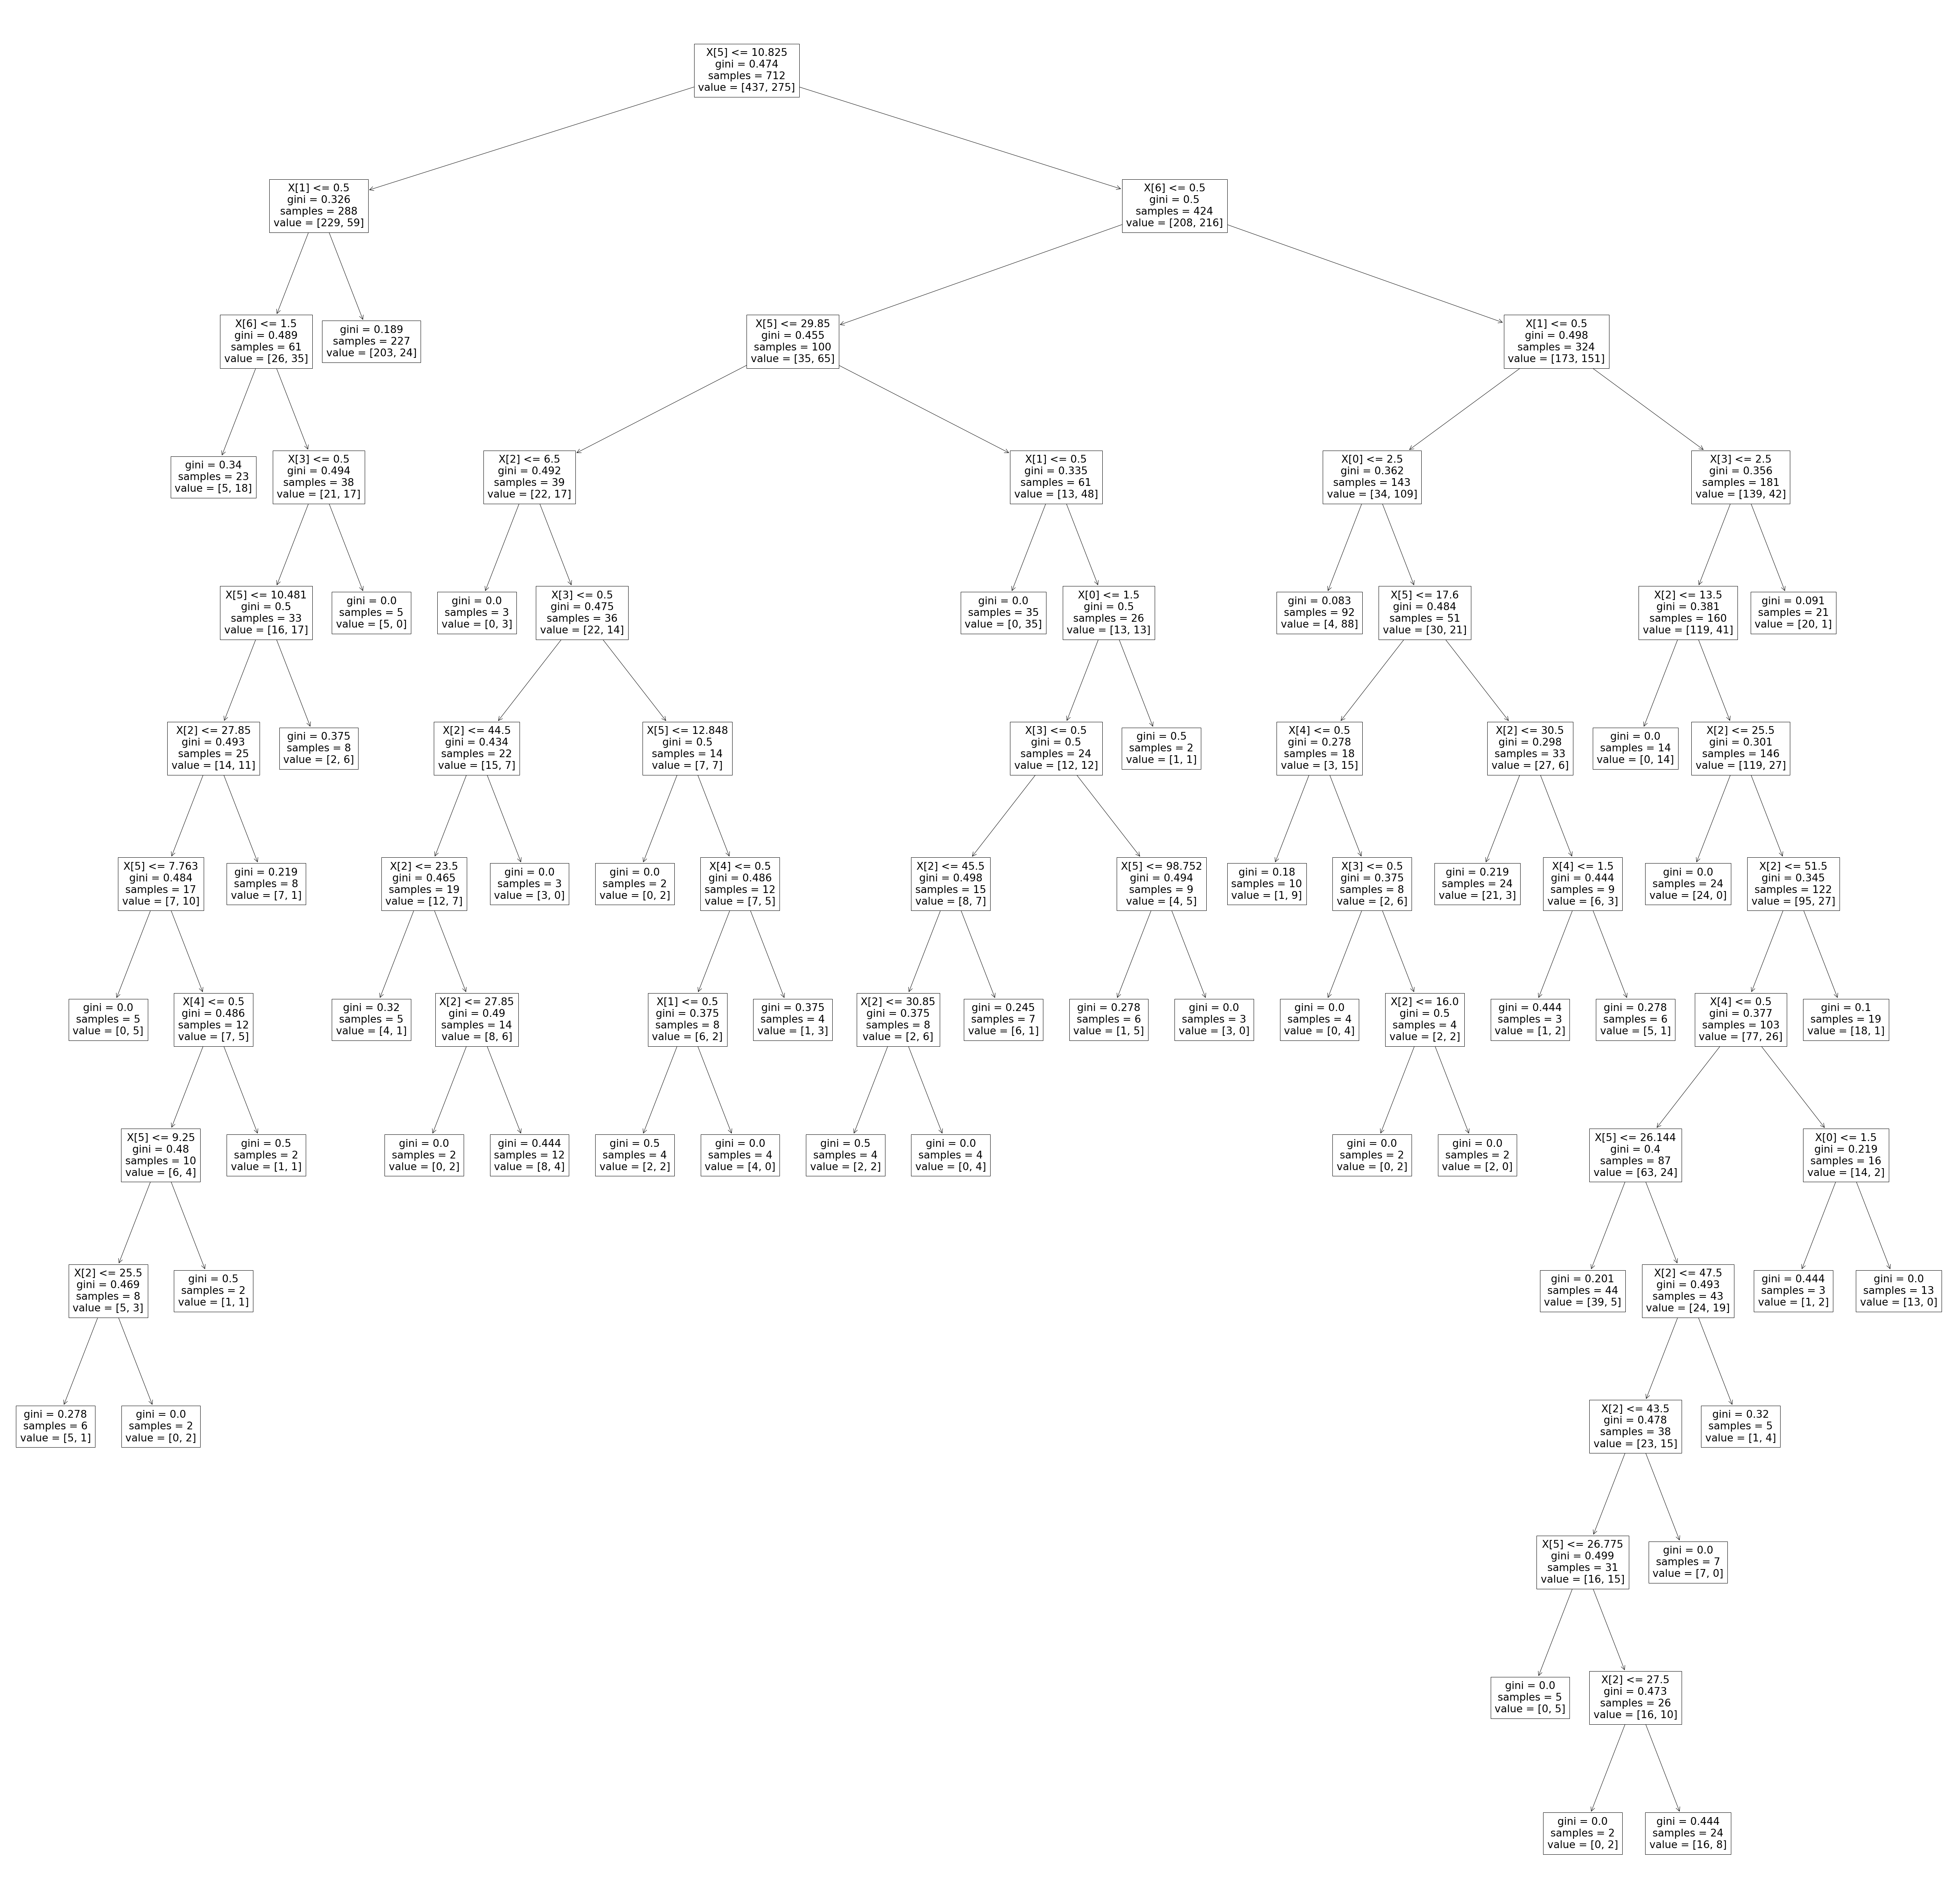

In [113]:
from sklearn import tree
plt.figure(figsize = (90,90))
tree.plot_tree(dt)
plt.show()